In [14]:
# Import required packages and functions and set the session seed
import numpy as np
np.random.seed(1234)
import tensorflow as tf
from tensorflow.random import set_seed 
tf.random.set_seed(1234)
from tensorflow import keras
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers import Dropout, SpatialDropout2D
from tensorflow.keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras import models
from keras import layers
from keras import optimizers

In [15]:
# Load the Fashion MNIST data from Keras
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [16]:
# Normalize the image data by dividing through the maximum pixel value (=255)
train_images = train_images / train_images.max()
test_images = test_images / test_images.max()

In [17]:
# Build a simple three-layer (1 hidden layer) model
# The input size is 28 x 28 pixels and is flattened to a vector of length 784
# The activation function is RELU (rectified linear unit) and performs the 
# multiplication of input and weights (plus bias)
# The output (softmax) layer returns probabilities for all ten classes
three_layer_model = Sequential()
three_layer_model.add(Flatten(input_shape = (28, 28)))
three_layer_model.add(Dense(128, activation = 'relu'))
three_layer_model.add(Dense(10, activation = 'softmax'))

2022-03-20 12:07:56.579508: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-20 12:07:56.624771: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-20 12:07:56.625300: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-20 12:07:56.627092: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [36]:
# Compile the model with accuracy metric and adam optimizer
# Sparse categorical cross-entropy is the loss function for integer labels
# Fit the model using 70 percent of the data and 10 epochs
three_layer_model.compile(loss = 'sparse_categorical_crossentropy', 
                          optimizer = 'adam', metrics = ['acc'])
three_layer_model.fit(train_images, train_labels, epochs = 10, 
                      validation_split = 0.3, verbose = 2)

Epoch 1/10
1313/1313 - 4s - loss: 0.0742 - acc: 0.9728 - val_loss: 0.5767 - val_acc: 0.8888 - 4s/epoch - 3ms/step
Epoch 2/10
1313/1313 - 3s - loss: 0.0717 - acc: 0.9729 - val_loss: 0.5901 - val_acc: 0.8881 - 3s/epoch - 2ms/step
Epoch 3/10
1313/1313 - 3s - loss: 0.0710 - acc: 0.9733 - val_loss: 0.5622 - val_acc: 0.8883 - 3s/epoch - 2ms/step
Epoch 4/10
1313/1313 - 3s - loss: 0.0699 - acc: 0.9745 - val_loss: 0.5675 - val_acc: 0.8917 - 3s/epoch - 2ms/step
Epoch 5/10
1313/1313 - 3s - loss: 0.0667 - acc: 0.9753 - val_loss: 0.5999 - val_acc: 0.8850 - 3s/epoch - 2ms/step
Epoch 6/10
1313/1313 - 3s - loss: 0.0639 - acc: 0.9767 - val_loss: 0.5730 - val_acc: 0.8912 - 3s/epoch - 2ms/step
Epoch 7/10
1313/1313 - 3s - loss: 0.0684 - acc: 0.9753 - val_loss: 0.5932 - val_acc: 0.8913 - 3s/epoch - 2ms/step
Epoch 8/10
1313/1313 - 3s - loss: 0.0611 - acc: 0.9775 - val_loss: 0.5933 - val_acc: 0.8874 - 3s/epoch - 2ms/step
Epoch 9/10
1313/1313 - 3s - loss: 0.0661 - acc: 0.9757 - val_loss: 0.6046 - val_acc: 0.8

In [37]:
# Compute and print the test loss and accuracy
test_loss, test_acc = three_layer_model.evaluate(test_images, test_labels)
print("Model with three layers and ten epochs -- Test loss:", test_loss * 100)
print("Model with three layers and ten epochs -- Test accuracy:", test_acc * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.6749 - acc: 0.8820
Model with three layers and ten epochs -- Test loss: 67.49342679977417
Model with three layers and ten epochs -- Test accuracy: 88.20000290870667


In [38]:
# Similarly as before, build a five-layer (3 hidden layers) model
five_layer_model = Sequential()
five_layer_model.add(Flatten(input_shape = (28, 28)))
five_layer_model.add(Dense(128, activation = 'relu'))
five_layer_model.add(Dense(128, activation = 'relu'))
five_layer_model.add(Dense(128, activation = 'relu'))
five_layer_model.add(Dense(10, activation = 'softmax'))

In [39]:
# Compile the model with accuracy metric and adam optimizer
# Fit the model using 70 percent of the data and 10 epochs
five_layer_model.compile(loss = 'sparse_categorical_crossentropy', 
                         optimizer = 'adam', metrics = ['accuracy'])
five_layer_model.fit(train_images, train_labels, epochs = 10, 
                     validation_split = 0.3, verbose = 2)

Epoch 1/10
1313/1313 - 4s - loss: 0.5237 - accuracy: 0.8125 - val_loss: 0.4040 - val_accuracy: 0.8561 - 4s/epoch - 3ms/step
Epoch 2/10
1313/1313 - 4s - loss: 0.3867 - accuracy: 0.8576 - val_loss: 0.3647 - val_accuracy: 0.8676 - 4s/epoch - 3ms/step
Epoch 3/10
1313/1313 - 4s - loss: 0.3482 - accuracy: 0.8709 - val_loss: 0.3467 - val_accuracy: 0.8736 - 4s/epoch - 3ms/step
Epoch 4/10
1313/1313 - 3s - loss: 0.3250 - accuracy: 0.8794 - val_loss: 0.3636 - val_accuracy: 0.8699 - 3s/epoch - 3ms/step
Epoch 5/10
1313/1313 - 4s - loss: 0.3048 - accuracy: 0.8866 - val_loss: 0.3394 - val_accuracy: 0.8794 - 4s/epoch - 3ms/step
Epoch 6/10
1313/1313 - 4s - loss: 0.2904 - accuracy: 0.8909 - val_loss: 0.3499 - val_accuracy: 0.8703 - 4s/epoch - 3ms/step
Epoch 7/10
1313/1313 - 3s - loss: 0.2763 - accuracy: 0.8959 - val_loss: 0.3189 - val_accuracy: 0.8847 - 3s/epoch - 2ms/step
Epoch 8/10
1313/1313 - 4s - loss: 0.2636 - accuracy: 0.8991 - val_loss: 0.3248 - val_accuracy: 0.8841 - 4s/epoch - 3ms/step
Epoch 9/

In [40]:
# Compute and print the test loss and accuracy
test_loss, test_acc = five_layer_model.evaluate(test_images, test_labels)
print("Model with five layers and ten epochs -- Test loss:", test_loss * 100)
print("Model with five layers and ten epochs -- Test accuracy:", test_acc * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.3664 - accuracy: 0.8701
Model with five layers and ten epochs -- Test loss: 36.636048555374146
Model with five layers and ten epochs -- Test accuracy: 87.01000213623047


In [41]:
# Similarly as before, build a ten-layer (8 hidden layers) model
ten_layer_model = Sequential()
ten_layer_model.add(Flatten(input_shape = (28, 28)))
ten_layer_model.add(Dense(128, activation = 'relu'))
ten_layer_model.add(Dense(128, activation = 'relu'))
ten_layer_model.add(Dense(128, activation = 'relu'))
ten_layer_model.add(Dense(128, activation = 'relu'))
ten_layer_model.add(Dense(128, activation = 'relu'))
ten_layer_model.add(Dense(128, activation = 'relu'))
ten_layer_model.add(Dense(128, activation = 'relu'))
ten_layer_model.add(Dense(128, activation = 'relu'))
ten_layer_model.add(Dense(10, activation = 'softmax'))

In [24]:
# Compile the model with accuracy metric and adam optimizer
# Fit the model using 70 percent of the data and 10 epochs
ten_layer_model.compile(loss = 'sparse_categorical_crossentropy', 
                        optimizer = 'adam', metrics = ['accuracy'])
ten_layer_model.fit(train_images, train_labels, epochs = 10, 
                    validation_split = 0.3, verbose = 2)

Epoch 1/10
1313/1313 - 5s - loss: 0.5936 - accuracy: 0.7814 - val_loss: 0.4528 - val_accuracy: 0.8426 - 5s/epoch - 4ms/step
Epoch 2/10
1313/1313 - 4s - loss: 0.4271 - accuracy: 0.8459 - val_loss: 0.3891 - val_accuracy: 0.8614 - 4s/epoch - 3ms/step
Epoch 3/10
1313/1313 - 4s - loss: 0.3792 - accuracy: 0.8639 - val_loss: 0.3790 - val_accuracy: 0.8624 - 4s/epoch - 3ms/step
Epoch 4/10
1313/1313 - 4s - loss: 0.3565 - accuracy: 0.8712 - val_loss: 0.3591 - val_accuracy: 0.8683 - 4s/epoch - 3ms/step
Epoch 5/10
1313/1313 - 4s - loss: 0.3366 - accuracy: 0.8783 - val_loss: 0.3483 - val_accuracy: 0.8809 - 4s/epoch - 3ms/step
Epoch 6/10
1313/1313 - 4s - loss: 0.3276 - accuracy: 0.8815 - val_loss: 0.3765 - val_accuracy: 0.8645 - 4s/epoch - 3ms/step
Epoch 7/10
1313/1313 - 4s - loss: 0.3104 - accuracy: 0.8885 - val_loss: 0.3317 - val_accuracy: 0.8830 - 4s/epoch - 3ms/step
Epoch 8/10
1313/1313 - 4s - loss: 0.3010 - accuracy: 0.8900 - val_loss: 0.3892 - val_accuracy: 0.8668 - 4s/epoch - 3ms/step
Epoch 9/

In [25]:
# Compute and print the test loss and accuracy
test_loss, test_acc = ten_layer_model.evaluate(test_images, test_labels)
print("Model with ten layers and ten epochs -- Test loss:", test_loss * 100)
print("Model with ten layers and ten epochs -- Test accuracy:", test_acc * 100)

313/313 [==============================] - 1s 3ms/step - loss: 0.4019 - accuracy: 0.8646
Model with ten layers and ten epochs -- Test loss: 40.19055962562561
Model with ten layers and ten epochs -- Test accuracy: 86.46000027656555


In [26]:
# Compile the model with accuracy metric and adam optimizer
# Fit the model using 70 percent of the data and 50 epochs
three_layer_model_50_epochs = three_layer_model.fit(train_images, train_labels, 
                                                  epochs = 50, validation_split = 0.3,
                                                  verbose = 2)

Epoch 1/50
1313/1313 - 3s - loss: 0.2349 - accuracy: 0.9117 - val_loss: 0.3197 - val_accuracy: 0.8884 - 3s/epoch - 2ms/step
Epoch 2/50
1313/1313 - 3s - loss: 0.2270 - accuracy: 0.9152 - val_loss: 0.3832 - val_accuracy: 0.8742 - 3s/epoch - 2ms/step
Epoch 3/50
1313/1313 - 3s - loss: 0.2213 - accuracy: 0.9178 - val_loss: 0.3222 - val_accuracy: 0.8885 - 3s/epoch - 2ms/step
Epoch 4/50
1313/1313 - 2s - loss: 0.2135 - accuracy: 0.9200 - val_loss: 0.3209 - val_accuracy: 0.8922 - 2s/epoch - 2ms/step
Epoch 5/50
1313/1313 - 3s - loss: 0.2058 - accuracy: 0.9217 - val_loss: 0.3335 - val_accuracy: 0.8905 - 3s/epoch - 2ms/step
Epoch 6/50
1313/1313 - 3s - loss: 0.1984 - accuracy: 0.9259 - val_loss: 0.3623 - val_accuracy: 0.8768 - 3s/epoch - 2ms/step
Epoch 7/50
1313/1313 - 3s - loss: 0.1943 - accuracy: 0.9261 - val_loss: 0.3249 - val_accuracy: 0.8922 - 3s/epoch - 3ms/step
Epoch 8/50
1313/1313 - 3s - loss: 0.1880 - accuracy: 0.9295 - val_loss: 0.3389 - val_accuracy: 0.8888 - 3s/epoch - 2ms/step
Epoch 9/

In [43]:
# Compute and print the test loss and accuracy
test_loss, test_acc = three_layer_model.evaluate(test_images, test_labels)
print("Model with three layers and fifty epochs -- Test loss:", test_loss * 100)
print("Model with three layers and fifty epochs -- Test accuracy:", test_acc * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.6749 - acc: 0.8820
Model with three layers and fifty epochs -- Test loss: 67.49342679977417
Model with three layers and fifty epochs -- Test accuracy: 88.20000290870667


KeyError: 'acc'

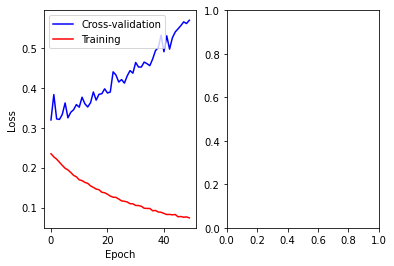

In [44]:
# Plot loss as function of epochs
plt.subplot(1, 2, 1)
plt.plot(three_layer_model_50_epochs.history['val_loss'], 'blue')
plt.plot(three_layer_model_50_epochs.history['loss'], 'red')
plt.legend(['Cross-validation', 'Training'], loc = 'upper left')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Plot accuracy as function of epochs
plt.subplot(1, 2, 2)
plt.plot(three_layer_model_50_epochs.history['acc'], 'red')
plt.plot(three_layer_model_50_epochs.history['val_acc'], 'blue')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.subplots_adjust(wspace = .35)

# Include plot title and show the plot
plt.suptitle('Model loss and accuracy over epochs for a three-layer neural network')
plt.show()

In [ ]:
# Calculate and print predictions versus actual labels
predictions = three_layer_model.predict(test_images)
for i in range(10):
  print("Prediction " + str(i) + ": " + str(np.argmax(np.round(predictions[i]))))
  print("Actual " + str(i) + ": " + str(test_labels[i]))

In [ ]:
# Reload the data for a convolutional neural network
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
# Reshape the data to the correct format (the last 1 stands for greyscale)
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [ ]:
# Convert the image data to numeric data and normalize them
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / train_images.max()
test_images = test_images / test_images.max()

In [ ]:
# One-hot encode the label data
# Convert every number to a vector of the length of the number of categories
# The vector has zero everywhere except a one on the position of the number it 
# represents. Example: 3 = [0 0 0 1 0 0 0 0 0 0]
train_labels_bin = to_categorical(train_labels)
test_labels_bin = to_categorical(test_labels)

In [ ]:
# Build a convolutional neural network with two convolutional layers
conv_model = Sequential()
conv_model.add(Conv2D(128, (3, 3), input_shape = (28, 28, 1)))
conv_model.add(Activation('relu'))
conv_model.add(MaxPooling2D(pool_size = (2, 2)))
conv_model.add(Conv2D(128, (3, 3)))
conv_model.add(Activation('relu'))
conv_model.add(MaxPooling2D(pool_size = (2, 2)))
conv_model.add(Flatten())
conv_model.add(Dense(128))
conv_model.add(Dense(10))
conv_model.add(Activation('softmax'))

In [34]:
# Compile and fit the model with adam optimizer and accuracy metric
# Categorical cross-entropy is the loss function for one-hot encoded labels and
# batch size equal to the number of neurons in the convolutional layers and 10 epochs
conv_model.compile(loss = "categorical_crossentropy", 
                   optimizer = 'adam', metrics = ['accuracy'])
conv_model.fit(train_images, train_labels_bin, batch_size = 128, 
               epochs = 10, verbose = 2)

NameError: name 'conv_model' is not defined

In [35]:
# Compute and print the test loss and accuracy
test_loss, test_acc = conv_model.evaluate(test_images, test_labels_bin)
print("Convolutional model ten epochs -- Test loss:", test_loss * 100)
print("Convolutional model ten epochs -- Test accuracy:", test_acc * 100)

NameError: name 'conv_model' is not defined

In [ ]:
# Build a convolutional neural network with two convolutional layers
# Decrease number of neurons and add dropout to reduce overfitting
conv_model_reduce_overfit = Sequential()
conv_model_reduce_overfit.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1)))
conv_model_reduce_overfit.add(Activation('relu'))
conv_model_reduce_overfit.add(MaxPooling2D(pool_size = (2, 2)))
conv_model_reduce_overfit.add(Dropout(0.5))
conv_model_reduce_overfit.add(Conv2D(64, (3, 3)))
conv_model_reduce_overfit.add(SpatialDropout2D(0.5))
conv_model_reduce_overfit.add(Activation('relu'))
conv_model_reduce_overfit.add(MaxPooling2D(pool_size = (2, 2)))
conv_model_reduce_overfit.add(Flatten())
conv_model_reduce_overfit.add(Dense(64))
conv_model_reduce_overfit.add(Dropout(0.5))
conv_model_reduce_overfit.add(Dense(10))
conv_model_reduce_overfit.add(Activation('softmax'))

In [ ]:
# Compile and fit the model with adam optimizer and accuracy metric
# Categorical cross-entropy is the loss function for one-hot encoded labels and
# batch size equal to the number of neurons in the convolutional layers and 10 epochs
# Add early stopping to avoid overfitting
conv_model_reduce_overfit.compile(loss = "categorical_crossentropy", 
                   optimizer = 'adam', metrics = ['accuracy'])
conv_callback = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)
conv_model_reduce_overfit.fit(train_images, train_labels_bin, validation_split = 0.3,
               epochs = 10, verbose = 2, callbacks = [conv_callback], batch_size = 64)

In [ ]:
# Compute and print the test loss and accuracy
test_loss, test_acc = conv_model_reduce_overfit.evaluate(test_images, test_labels_bin)
print("Convolutional model ten epochs reduced overfit -- Test loss:", test_loss * 100)
print("Convolutional model ten epochs reduced overfit -- Test accuracy:", test_acc * 100)

In [ ]:
# Calculate and print predictions versus actual labels
predictions = conv_model_reduce_overfit.predict(test_images)
for i in range(10):
  print("Prediction " + str(i) + ": " + str(np.argmax(np.round(predictions[i]))))
  print("Actual " + str(i) + ": " + str(test_labels[i]))